In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
!pip install pandas --upgrade

In [4]:
data=pd.read_csv("D:\Projects\Consignment\consignment_data\Consignment_pricing_raw.csv")
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [5]:
print("\n EDA on Complete dataset\n")
print("*"*90)
print("\nFeatures\columns:\n {}".format(data.columns))
print("*"*90)
print("\n\nNo of Rows: {}".format(data.shape[1]))
print("*"*90)
print("\n\nData Type: \n {}".format(data.dtypes))
print("*"*90)
print("\nContains nan values in the cells: {}\n".format(data.isna().values.any()))
print("*"*90)
print("\nTotal Empty cells by columns :\n{}".format(data.isna().sum()),"\n\n")
print("*"*90)


 EDA on Complete dataset

******************************************************************************************

Features\columns:
 Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')
******************************************************************************************


No of Rows: 33
*********************************************

In [6]:
data.shape

(10324, 33)

In [7]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,10324.0,NaN,NaN,NaN,51098.968229,31944.332496,1.0,12795.75,57540.5,83648.25,86823.0
Project Code,10324,142,116-ZA-T30,768,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PQ #,10324,1237,Pre-PQ Process,2681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PO / SO #,10324,6233,SCMS-199289,67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASN/DN #,10324,7030,ASN-19166,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,10324,43,South Africa,1406,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Managed By,10324,4,PMO - US,10265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fulfill Via,10324,2,From RDC,5404,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vendor INCO Term,10324,8,N/A - From RDC,5404,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Shipment Mode,9964,4,Air,6113,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [9]:
data.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [10]:
data.columns=data.columns.str.lower()

In [11]:
data.columns=data.columns.str.replace(" ","_")

In [12]:
data.columns

Index(['id', 'project_code', 'pq_#', 'po_/_so_#', 'asn/dn_#', 'country',
       'managed_by', 'fulfill_via', 'vendor_inco_term', 'shipment_mode',
       'pq_first_sent_to_client_date', 'po_sent_to_vendor_date',
       'scheduled_delivery_date', 'delivered_to_client_date',
       'delivery_recorded_date', 'product_group', 'sub_classification',
       'vendor', 'item_description', 'molecule/test_type', 'brand', 'dosage',
       'dosage_form', 'unit_of_measure_(per_pack)', 'line_item_quantity',
       'line_item_value', 'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_(kilograms)', 'freight_cost_(usd)',
       'line_item_insurance_(usd)'],
      dtype='object')

In [13]:
data.head()

,id,project_code,pq_#,po_/_so_#,asn/dn_#,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,...,unit_of_measure_(per_pack),line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_(kilograms),freight_cost_(usd),line_item_insurance_(usd)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [14]:
data.drop(["id","project_code","pq_#"],axis=1,inplace=True)

In [15]:
data.head()


,po_/_so_#,asn/dn_#,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,pq_first_sent_to_client_date,po_sent_to_vendor_date,scheduled_delivery_date,...,unit_of_measure_(per_pack),line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_(kilograms),freight_cost_(usd),line_item_insurance_(usd)
0,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


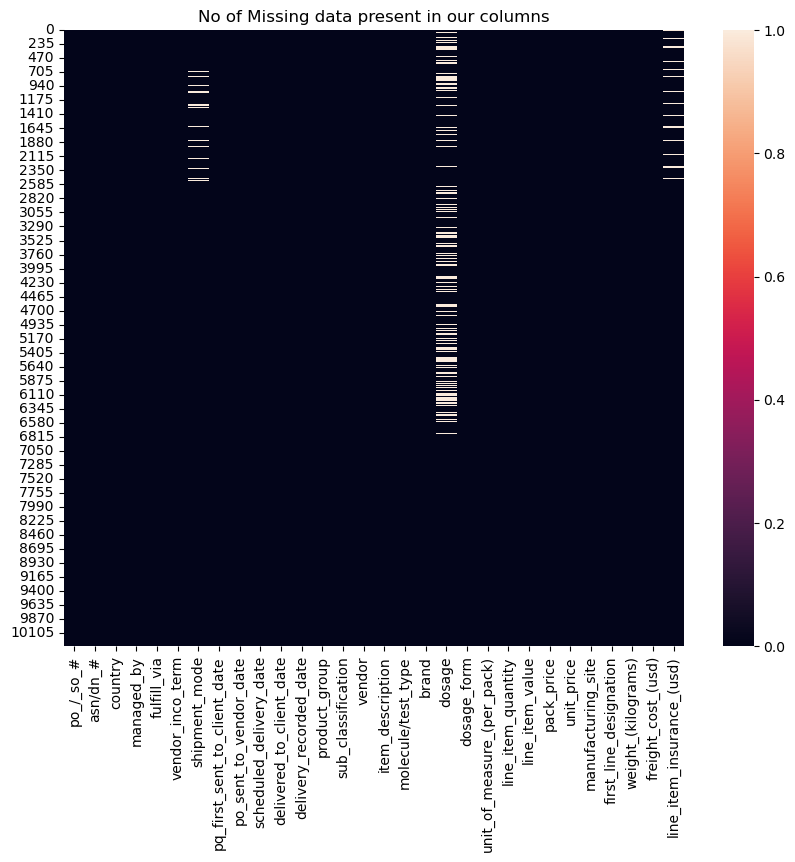

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(data.isna())
plt.title("No of Missing data present in our columns")
plt.show()

In [17]:
missing_data=data[["shipment_mode","dosage","line_item_insurance_(usd)"]]


In [18]:
missing_data

,shipment_mode,dosage,line_item_insurance_(usd)
0,Air,NaN,NaN
1,Air,10mg/ml,NaN
2,Air,NaN,NaN
3,Air,150mg,NaN
4,Air,30mg,NaN
...,...,...,...
10319,Truck,30/50/60mg,705.79
10320,Truck,150/300mg,161.71
10321,Truck,600/300/300mg,5284.04
10322,Truck,150/300mg,134.03


In [19]:
for cols in missing_data.columns[0:]:
        print(cols,"has",data[cols].isna().sum(),"missing values")

shipment_mode has 360 missing values
dosage has 1736 missing values
line_item_insurance_(usd) has 287 missing values


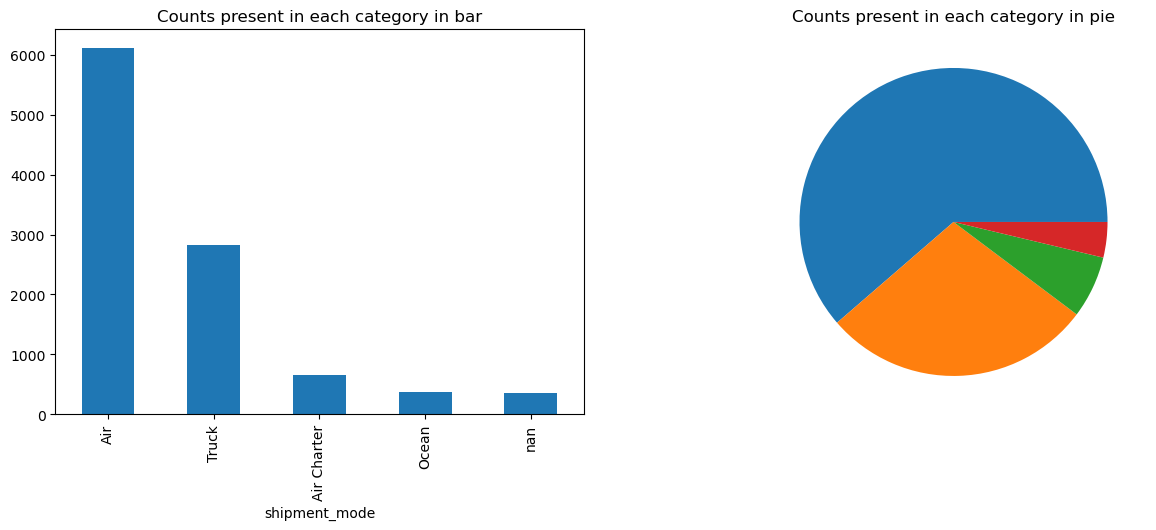

In [20]:
fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(121)
data["shipment_mode"].value_counts(dropna=False).plot.bar()
plt.title("Counts present in each category in bar")

ax1=fig.add_subplot(122)
plt.pie(data["shipment_mode"].value_counts())
plt.title("Counts present in each category in pie")
plt.show()

In [21]:
missing_data["shipment_mode"].fillna("Air",inplace=True)


In [22]:
missing_data["shipment_mode"].value_counts(dropna=False)

shipment_mode
Air            6473
Truck          2830
Air Charter     650
Ocean           371
Name: count, dtype: int64

In [23]:
data["dosage"].value_counts()


dosage
300mg              990
200mg              932
600mg              772
150/300mg          600
150/300/200mg      580
10mg/ml            552
150mg              431
200/50mg           395
300/300mg          301
600/300/300mg      286
150/200/30mg       250
100mg              228
50mg               174
200/300mg          160
80/20mg/ml         158
400mg              156
20mg/ml            152
30mg               144
600/200/300mg      139
150/30mg           133
30/50/60mg         127
300/200mg           94
30/60mg             89
250mg               88
60/30mg             73
100/25mg            73
600/300mg           63
300/100mg           54
1mg/ml              54
20mg                43
25mg                39
15mg                38
30mg/ml             33
300/150/300mg       28
30/50/6mg           19
30/6mg              14
80mg/ml             13
500/25mg            13
60/100/12mg         12
20/120mg            12
2g                  11
500mg               10
150/300+200mg        8
150/

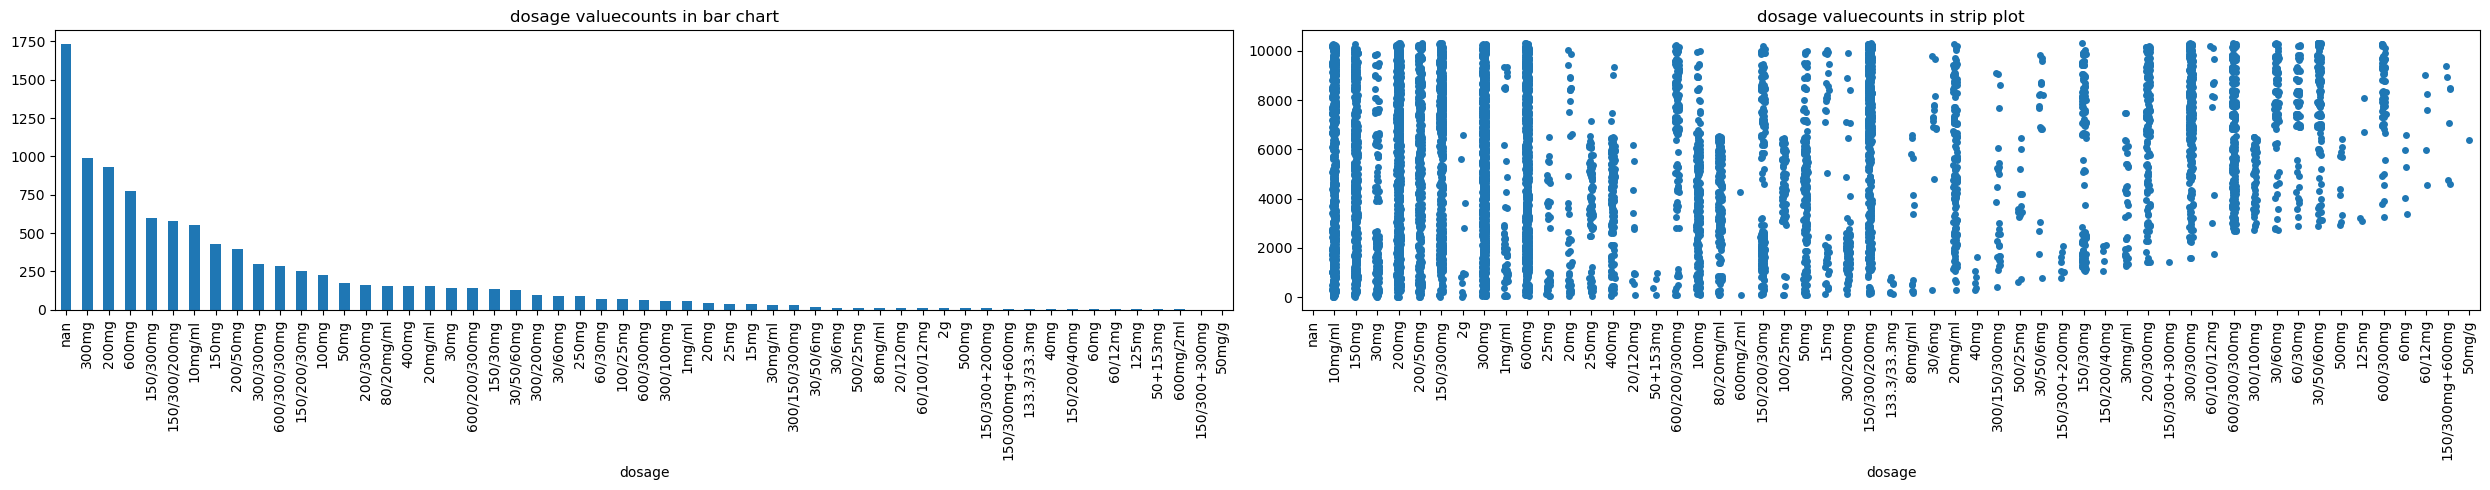

In [24]:
fig=plt.figure(figsize=(25,5))
ax0=fig.add_subplot(121)
data["dosage"].value_counts(dropna=False).plot.bar()
plt.title("dosage valuecounts in bar chart")

ax1=fig.add_subplot(122)
x=data["dosage"]
y=data.index
plt.xticks(rotation=90)
sns.stripplot(x=x,y=y)
plt.title("dosage valuecounts in strip plot")
plt.tight_layout()
plt.show()

In [25]:
missing_data.drop("dosage",axis=1,inplace=True)

In [26]:
missing_data["line_item_insurance_(usd)"].value_counts()


line_item_insurance_(usd)
0.00      54
0.02      37
0.07      33
0.06      30
0.05      30
          ..
381.78     1
858.86     1
332.18     1
222.58     1
85.82      1
Name: count, Length: 6722, dtype: int64

In [27]:
missing_data["line_item_insurance_(usd)"]=missing_data["line_item_insurance_(usd)"].replace({"NaN":np.nan})

In [28]:
missing_data["line_item_insurance_(usd)"].fillna(missing_data["line_item_insurance_(usd)"].median)


0        <bound method NDFrame._add_numeric_operations....
1        <bound method NDFrame._add_numeric_operations....
2        <bound method NDFrame._add_numeric_operations....
3        <bound method NDFrame._add_numeric_operations....
4        <bound method NDFrame._add_numeric_operations....
                               ...                        
10319                                               705.79
10320                                               161.71
10321                                              5284.04
10322                                               134.03
10323                                                85.82
Name: line_item_insurance_(usd), Length: 10324, dtype: object

In [29]:
missing_data["line_item_insurance_(usd)"].median()


47.04

In [30]:
missing_data["line_item_insurance_(usd)"].fillna(47.04,inplace=True)


In [31]:
missing_data.head()

,shipment_mode,line_item_insurance_(usd)
0,Air,47.04
1,Air,47.04
2,Air,47.04
3,Air,47.04
4,Air,47.04


In [32]:
data.head()

,po_/_so_#,asn/dn_#,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,pq_first_sent_to_client_date,po_sent_to_vendor_date,scheduled_delivery_date,...,unit_of_measure_(per_pack),line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_(kilograms),freight_cost_(usd),line_item_insurance_(usd)
0,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [33]:
data.drop(["shipment_mode","line_item_insurance_(usd)","dosage"],axis=1,inplace=True)

In [34]:
data=pd.concat([data,missing_data],axis=1)

In [35]:
obj_cols=[x for x in data.columns if data[x].dtypes=="O"]

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   po_/_so_#                     10324 non-null  object 
 1   asn/dn_#                      10324 non-null  object 
 2   country                       10324 non-null  object 
 3   managed_by                    10324 non-null  object 
 4   fulfill_via                   10324 non-null  object 
 5   vendor_inco_term              10324 non-null  object 
 6   pq_first_sent_to_client_date  10324 non-null  object 
 7   po_sent_to_vendor_date        10324 non-null  object 
 8   scheduled_delivery_date       10324 non-null  object 
 9   delivered_to_client_date      10324 non-null  object 
 10  delivery_recorded_date        10324 non-null  object 
 11  product_group                 10324 non-null  object 
 12  sub_classification            10324 non-null  object 
 13  v

In [37]:
num_cols=[y for y in data.columns if data[y].dtypes=="int64"or data[y].dtypes=="float64"]

In [38]:
numcols=data[num_cols]

In [39]:
objcols=data[obj_cols]
objcols

,po_/_so_#,asn/dn_#,country,managed_by,fulfill_via,vendor_inco_term,pq_first_sent_to_client_date,po_sent_to_vendor_date,scheduled_delivery_date,delivered_to_client_date,...,vendor,item_description,molecule/test_type,brand,dosage_form,manufacturing_site,first_line_designation,weight_(kilograms),freight_cost_(usd),shipment_mode
0,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,...,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,Test kit,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,Air
1,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,...,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,Oral suspension,"Aurobindo Unit III, India",Yes,358,4521.5,Air
2,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,...,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,Test kit,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,Air
3,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,...,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,Tablet,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,Air
4,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,...,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,Capsule,"Aurobindo Unit III, India",Yes,7590,45450.08,Air
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,10/16/14,N/A - From RDC,31-Jul-15,15-Jul-15,...,SCMS from RDC,"Lamivudine/Nevirapine/Zidovudine 30/50/60mg, d...",Lamivudine/Nevirapine/Zidovudine,Generic,Chewable/dispersible tablet - FDC,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),Truck
10320,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,10/24/14,N/A - From RDC,31-Jul-15,6-Aug-15,...,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,Tablet - FDC,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),Truck
10321,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,8/12/14,N/A - From RDC,31-Aug-15,25-Aug-15,...,SCMS from RDC,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Generic,Tablet - FDC,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,Truck
10322,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,7/1/15,N/A - From RDC,9-Sep-15,4-Aug-15,...,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,Tablet - FDC,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,Truck


In [40]:
for cols in objcols.columns[0:]:
    print(cols,"has",len(objcols[cols].unique()),"values")

po_/_so_# has 6233 values
asn/dn_# has 7030 values
country has 43 values
managed_by has 4 values
fulfill_via has 2 values
vendor_inco_term has 8 values
pq_first_sent_to_client_date has 765 values
po_sent_to_vendor_date has 897 values
scheduled_delivery_date has 2006 values
delivered_to_client_date has 2093 values
delivery_recorded_date has 2042 values
product_group has 5 values
sub_classification has 6 values
vendor has 73 values
item_description has 184 values
molecule/test_type has 86 values
brand has 48 values
dosage_form has 17 values
manufacturing_site has 88 values
first_line_designation has 2 values
weight_(kilograms) has 4688 values
freight_cost_(usd) has 6733 values
shipment_mode has 4 values


In [41]:
data["po_/_so_#"].value_counts()


po_/_so_#
SCMS-199289    67
SCMS-199283    63
SCMS-183950    55
SCMS-215370    38
SCMS-259075    38
               ..
SCMS-260830     1
SCMS-283040     1
SCMS-149030     1
SCMS-234070     1
SO-51680        1
Name: count, Length: 6233, dtype: int64

In [42]:
def plot(data,col_name):
    fig=plt.figure(figsize=(15,5))
    ax0=fig.add_subplot(121)
    data.value_counts().plot.bar()
    plt.title("bar plot for {} column".format(col_name))
    
    ax1=fig.add_subplot(122)
    data.value_counts().plot.pie()
    plt.title("pie chart for {} column".format(col_name))
    plt.show()

In [43]:
def reorder(data):
    data_split=data.split("-")
    data_return=data_split[0]
    return data_return

In [44]:
data["po_/_so_#"]=data["po_/_so_#"].apply(reorder)

In [45]:
data["po_/_so_#"]

0        SCMS
1        SCMS
2        SCMS
3        SCMS
4        SCMS
         ... 
10319      SO
10320      SO
10321      SO
10322      SO
10323      SO
Name: po_/_so_#, Length: 10324, dtype: object

In [46]:
data["po_/_so_#"].value_counts()

po_/_so_#
SO      5404
SCMS    4919
DSCM       1
Name: count, dtype: int64

In [47]:
data["asn/dn_#"].value_counts()

asn/dn_#
ASN-19166    54
ASN-24415    38
ASN-23875    26
ASN-32138    19
ASN-28034    17
             ..
ASN-11200     1
ASN-23000     1
ASN-19497     1
ASN-24569     1
DN-4334       1
Name: count, Length: 7030, dtype: int64

In [48]:
data["asn/dn_#"]=data["asn/dn_#"].apply(reorder)


In [49]:
data["asn/dn_#"].value_counts()

asn/dn_#
DN     5404
ASN    4920
Name: count, dtype: int64

In [50]:
data["country"].value_counts()

country
South Africa          1406
Nigeria               1194
Côte d'Ivoire         1083
Uganda                 779
Vietnam                688
Zambia                 683
Haiti                  655
Mozambique             631
Zimbabwe               538
Tanzania               519
Rwanda                 430
Congo, DRC             333
Guyana                 237
Ethiopia               216
South Sudan            164
Kenya                  111
Burundi                 98
Namibia                 95
Cameroon                75
Botswana                70
Ghana                   58
Dominican Republic      52
Sudan                   46
Swaziland               35
Mali                    17
Guatemala               15
Pakistan                15
Malawi                  14
Benin                   13
Lebanon                  8
Libya                    8
Angola                   7
Liberia                  6
Sierra Leone             4
Lesotho                  4
Senegal                  3
Togo                

In [51]:
data["country"]

0        Côte d'Ivoire
1              Vietnam
2        Côte d'Ivoire
3              Vietnam
4              Vietnam
             ...      
10319         Zimbabwe
10320    Côte d'Ivoire
10321           Zambia
10322         Zimbabwe
10323         Zimbabwe
Name: country, Length: 10324, dtype: object

In [52]:
data["managed_by"].value_counts()

managed_by
PMO - US                     10265
South Africa Field Office       57
Haiti Field Office               1
Ethiopia Field Office            1
Name: count, dtype: int64

In [53]:
print(data["managed_by"].value_counts()/len(data)*100)

managed_by
PMO - US                     99.428516
South Africa Field Office     0.552112
Haiti Field Office            0.009686
Ethiopia Field Office         0.009686
Name: count, dtype: float64


In [54]:
data.drop("managed_by",axis=1,inplace=True)

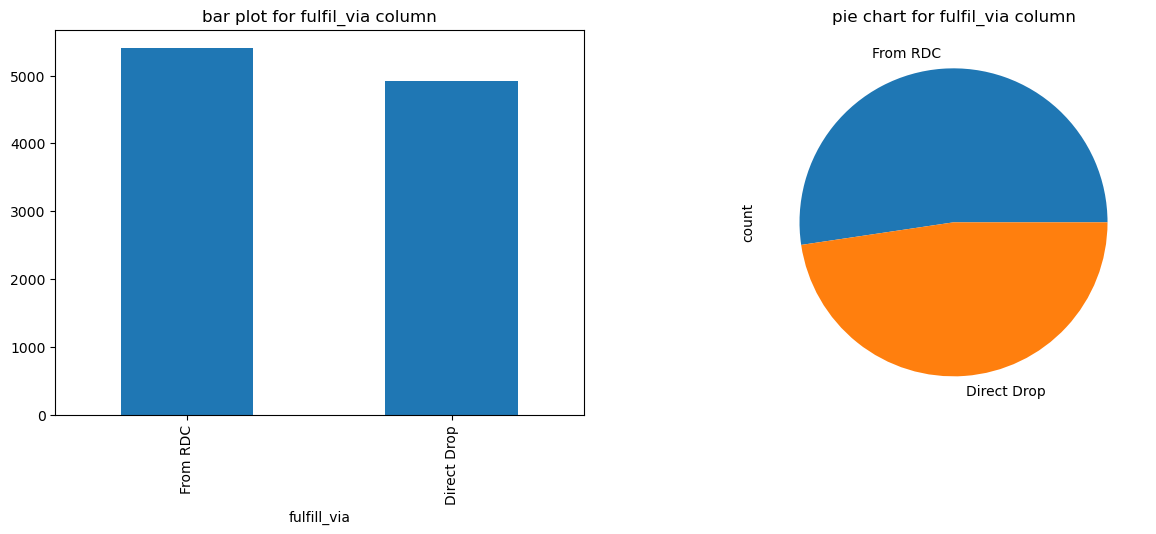

In [55]:
plot(data["fulfill_via"],"fulfil_via")

In [56]:
data["vendor_inco_term"].value_counts()

vendor_inco_term
N/A - From RDC    5404
EXW               2778
DDP               1443
FCA                397
CIP                275
DDU                 15
DAP                  9
CIF                  3
Name: count, dtype: int64

In [57]:
data["vendor_inco_term"]=data["vendor_inco_term"].replace(["DDU","DAP","CIF"],"others")

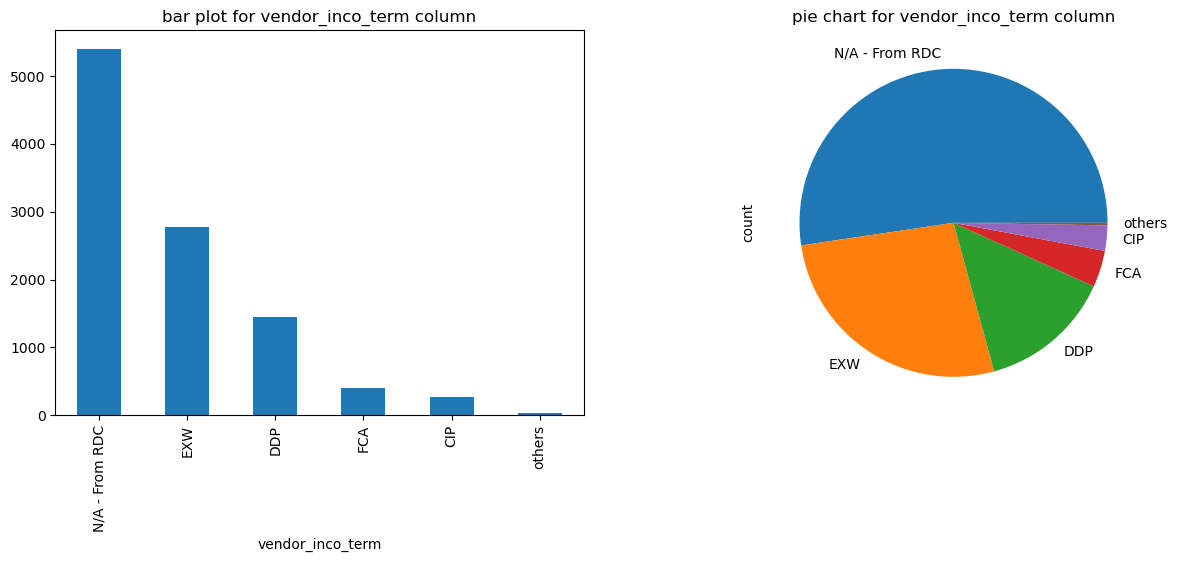

In [58]:
plot(data["vendor_inco_term"],"vendor_inco_term")


In [59]:
data["pq_first_sent_to_client_date"].value_counts()

pq_first_sent_to_client_date
Pre-PQ Process       2476
Date Not Captured     205
9/11/14               205
7/11/13               173
4/30/14               123
                     ... 
7/29/10                 1
10/3/11                 1
12/17/13                1
2/5/15                  1
8/29/13                 1
Name: count, Length: 765, dtype: int64

In [60]:
data["pq_first_sent_to_client_date"].nunique()


765

In [61]:
data["pq_first_sent_to_client_date"].min()

'1/10/12'

In [62]:
data["pq_first_sent_to_client_date"].max()

'Pre-PQ Process'

In [63]:
data["pq_first_sent_to_client_date"]

0        Pre-PQ Process
1        Pre-PQ Process
2        Pre-PQ Process
3        Pre-PQ Process
4        Pre-PQ Process
              ...      
10319          10/16/14
10320          10/24/14
10321           8/12/14
10322            7/1/15
10323          10/16/14
Name: pq_first_sent_to_client_date, Length: 10324, dtype: object

In [64]:
def client_dates(date):
    if date=="Pre-PQ Process":
        return pd.to_datetime('01/06/2009',format="%d/%m/%Y")
    elif date=="Date Not Captured":
        return "Date Not Captured"
    else:
        if len(date)<9:
            date=pd.to_datetime(date,format="%m/%d/%y")
            return date
        else:
            date=date.replace("-","/")
            date=pd.to_datetime(date,format="%d/%m/%Y")
            return date

In [65]:
data["pq_first_sent_to_client_date"]=data["pq_first_sent_to_client_date"].apply(client_dates)


In [66]:
data

,po_/_so_#,asn/dn_#,country,fulfill_via,vendor_inco_term,pq_first_sent_to_client_date,po_sent_to_vendor_date,scheduled_delivery_date,delivered_to_client_date,delivery_recorded_date,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_(kilograms),freight_cost_(usd),shipment_mode,line_item_insurance_(usd)
0,SCMS,ASN,Côte d'Ivoire,Direct Drop,EXW,2009-06-01 00:00:00,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,...,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,Air,47.04
1,SCMS,ASN,Vietnam,Direct Drop,EXW,2009-06-01 00:00:00,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,...,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,Air,47.04
2,SCMS,ASN,Côte d'Ivoire,Direct Drop,FCA,2009-06-01 00:00:00,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,...,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,Air,47.04
3,SCMS,ASN,Vietnam,Direct Drop,EXW,2009-06-01 00:00:00,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,...,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,Air,47.04
4,SCMS,ASN,Vietnam,Direct Drop,EXW,2009-06-01 00:00:00,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,...,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,Air,47.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,SO,DN,Zimbabwe,From RDC,N/A - From RDC,2014-10-16 00:00:00,N/A - From RDC,31-Jul-15,15-Jul-15,20-Jul-15,...,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),Truck,705.79
10320,SO,DN,Côte d'Ivoire,From RDC,N/A - From RDC,2014-10-24 00:00:00,N/A - From RDC,31-Jul-15,6-Aug-15,7-Aug-15,...,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),Truck,161.71
10321,SO,DN,Zambia,From RDC,N/A - From RDC,2014-08-12 00:00:00,N/A - From RDC,31-Aug-15,25-Aug-15,3-Sep-15,...,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,Truck,5284.04
10322,SO,DN,Zimbabwe,From RDC,N/A - From RDC,2015-07-01 00:00:00,N/A - From RDC,9-Sep-15,4-Aug-15,11-Aug-15,...,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,Truck,134.03


In [67]:
data["pq_first_sent_to_client_date"].value_counts()

pq_first_sent_to_client_date
2009-06-01 00:00:00    2476
Date Not Captured       205
2014-09-11 00:00:00     205
2013-07-11 00:00:00     173
2014-04-30 00:00:00     123
                       ... 
2010-07-29 00:00:00       1
2011-10-03 00:00:00       1
2013-12-17 00:00:00       1
2015-02-05 00:00:00       1
2013-08-29 00:00:00       1
Name: count, Length: 765, dtype: int64

In [68]:
data.drop(data.index[data["pq_first_sent_to_client_date"]=="Date Not Captured"],inplace=True)

In [69]:
data["pq_first_sent_to_client_date"].value_counts()

pq_first_sent_to_client_date
2009-06-01    2476
2014-09-11     205
2013-07-11     173
2014-04-30     123
2009-11-06      98
              ... 
2013-07-02       1
2010-09-21       1
2014-08-04       1
2012-11-07       1
2013-08-29       1
Name: count, Length: 764, dtype: int64

In [70]:
data["po_sent_to_vendor_date"].value_counts()

po_sent_to_vendor_date
N/A - From RDC       5199
Date Not Captured     328
8/27/14                80
3/19/10                78
8/29/14                76
                     ... 
5/18/15                 1
2/10/14                 1
10/16/13                1
12/9/11                 1
8/29/12                 1
Name: count, Length: 897, dtype: int64

In [71]:
# Dropping column as it's most infomation is captured by from RDC which is categorical and unknown to us

data.drop('po_sent_to_vendor_date', axis= 1,inplace=True)

In [72]:
data["scheduled_delivery_date"].value_counts()

scheduled_delivery_date
29-Aug-14    97
16-Mar-12    83
27-Aug-14    63
31-May-10    62
31-Jan-14    60
             ..
4-Apr-15      1
5-Jan-15      1
20-Jun-15     1
24-Apr-14     1
9-Sep-15      1
Name: count, Length: 1994, dtype: int64

In [73]:
def transform_date(data):
    data=data.replace("-","/")
    data=pd.to_datetime(data,format="%d/%b/%y")
    return data

In [74]:
data["scheduled_delivery_date"]=data["scheduled_delivery_date"].apply(transform_date)

In [75]:
data["scheduled_delivery_date"].value_counts()

scheduled_delivery_date
2014-08-29    97
2012-03-16    83
2014-08-27    63
2010-05-31    62
2014-01-31    60
              ..
2015-04-04     1
2015-01-05     1
2015-06-20     1
2014-04-24     1
2015-09-09     1
Name: count, Length: 1994, dtype: int64

In [76]:
data["delivery_recorded_date"]=data["delivery_recorded_date"].apply(transform_date)

In [77]:
data["delivered_to_client_date"].value_counts()

delivered_to_client_date
29-Aug-14    74
27-Aug-14    66
28-Jun-10    60
14-Feb-12    60
16-Apr-13    59
             ..
8-Sep-15      1
13-Dec-14     1
12-Jun-10     1
9-Aug-12      1
16-Apr-15     1
Name: count, Length: 2077, dtype: int64

In [78]:
data["delivered_to_client_date"]=data["delivered_to_client_date"].apply(transform_date)

In [79]:
data["delivered_to_client_date"].value_counts()

delivered_to_client_date
2014-08-29    74
2014-08-27    66
2010-06-28    60
2012-02-14    60
2013-04-16    59
              ..
2015-09-08     1
2014-12-13     1
2010-06-12     1
2012-08-09     1
2015-04-16     1
Name: count, Length: 2077, dtype: int64

In [80]:
data["product_group"].value_counts()

product_group
ARV     8345
HRDT    1728
ANTM      22
ACT       16
MRDT       8
Name: count, dtype: int64

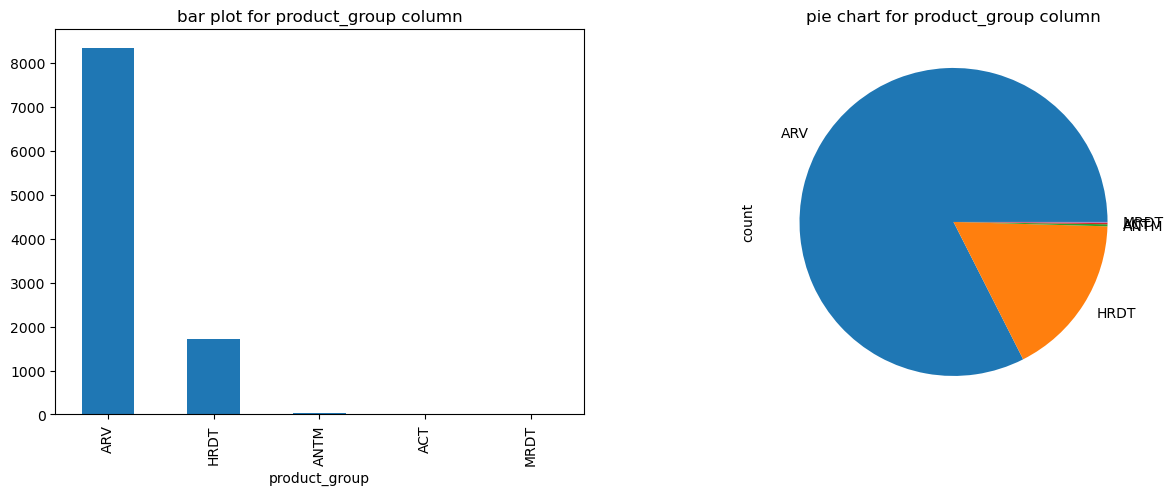

In [81]:
plot(data["product_group"],"product_group")

In [82]:
data.drop(["product_group"],axis=1,inplace=True)

In [83]:
data["sub_classification"].value_counts()

sub_classification
Adult                   6418
Pediatric               1927
HIV test                1567
HIV test - Ancillary     161
Malaria                   30
ACT                       16
Name: count, dtype: int64

In [84]:
data["vendor"].value_counts()

vendor
SCMS from RDC                                   5199
Orgenics, Ltd                                    754
S. BUYS WHOLESALER                               715
Aurobindo Pharma Limited                         668
Trinity Biotech, Plc                             356
                                                ... 
BIO-RAD LABORATORIES PTY LTD. (SOUTH AFRICA)       1
OMEGA DIAGNOSTICS LTD                              1
PLURIPHARM S.A.                                    1
CENTRAL PHARMACEUTICAL COMPANY NO. 1               1
AUROBINDO PHARAM (SOUTH AFRICA)                    1
Name: count, Length: 73, dtype: int64

In [85]:
data["vendor"].value_counts()/len(data)

vendor
SCMS from RDC                                   0.513786
Orgenics, Ltd                                   0.074513
S. BUYS WHOLESALER                              0.070659
Aurobindo Pharma Limited                        0.066014
Trinity Biotech, Plc                            0.035181
                                                  ...   
BIO-RAD LABORATORIES PTY LTD. (SOUTH AFRICA)    0.000099
OMEGA DIAGNOSTICS LTD                           0.000099
PLURIPHARM S.A.                                 0.000099
CENTRAL PHARMACEUTICAL COMPANY NO. 1            0.000099
AUROBINDO PHARAM (SOUTH AFRICA)                 0.000099
Name: count, Length: 73, dtype: float64

Text(0.5, 1.0, 'bar chart for vendor column')

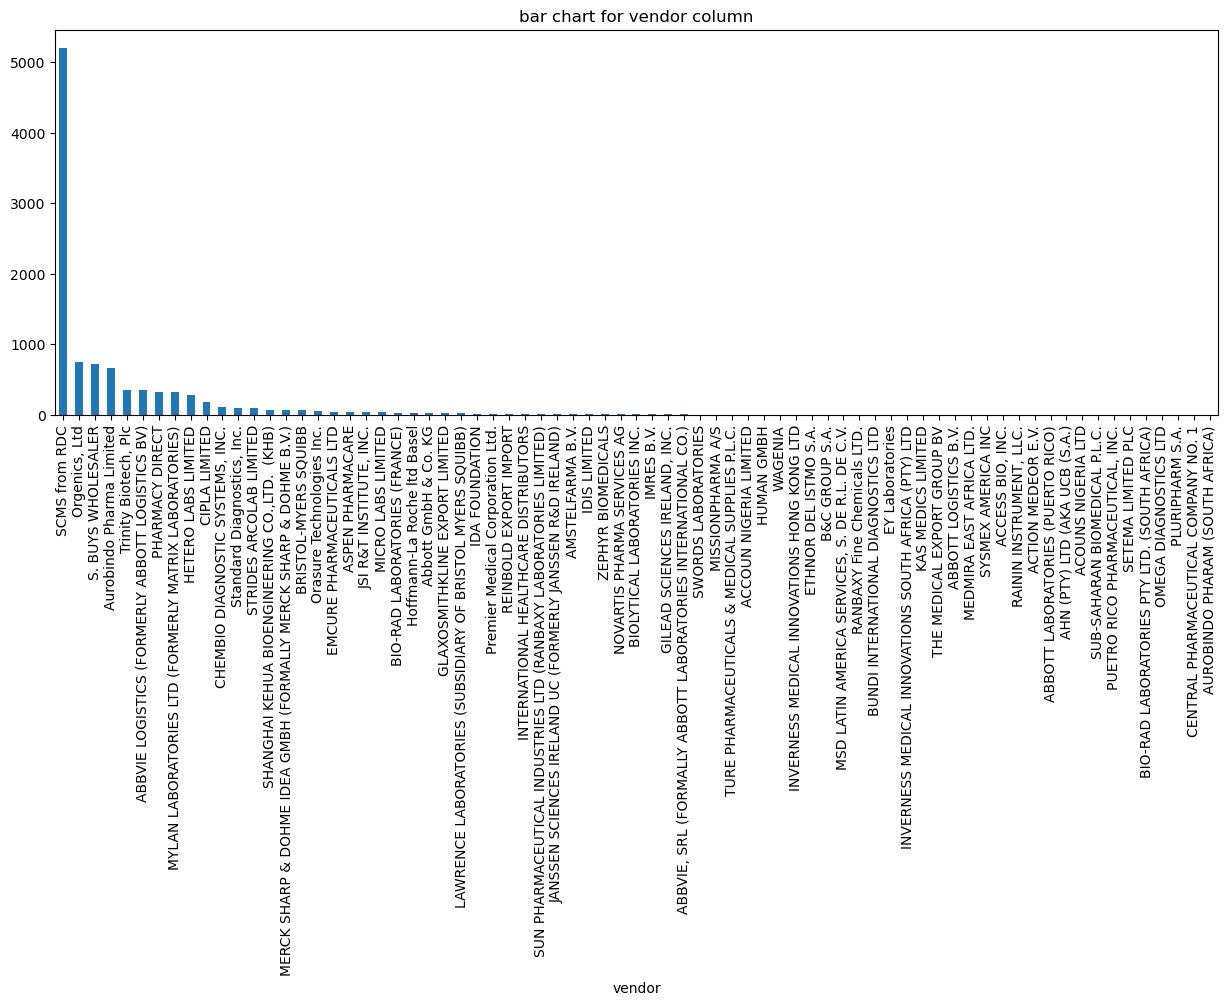

In [86]:
plt.figure(figsize=(15,5))
data["vendor"].value_counts().plot.bar()
plt.title("bar chart for vendor column")

In [87]:
#highly biased columns i will drop it
data.drop("vendor",axis=1,inplace=True)

In [88]:
data["item_description"].value_counts()

item_description
Efavirenz 600mg, tablets, 30 Tabs                                                733
Nevirapine 200mg, tablets, 60 Tabs                                               605
Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs                                580
HIV 1/2, Determine Complete HIV Kit, 100 Tests                                   577
Lamivudine/Nevirapine/Zidovudine 150/200/300mg, tablets, 60 Tabs                 554
                                                                                ... 
Lamivudine/Zidovudine+Abacavir 150/300+300mg, tablets, co-blister, 60+60 Tabs      1
HIV, Pepti-LAV 1|2 (HIV-1|2 Ab differenciation, Immuno-Blot)                       1
Malaria Antigen P.f Kit, 30 x 1 Test                                               1
Lopinavir/Ritonavir 80/20mg/ml [Kaletra], oral solution, cool, Bottle, 160 ml      1
Lopinavir/Ritonavir 200/50mg, [DON] tablets, 120 Tabs                              1
Name: count, Length: 184, dtype: int64

In [89]:
#it would be useful if we are using nlp or rnn embedding techniques but in case of ml this column is useless
data.drop("item_description",axis=1,inplace=True)

In [90]:
data["molecule/test_type"].value_counts()

molecule/test_type
Efavirenz                           1099
Nevirapine                           854
Lamivudine/Nevirapine/Zidovudine     681
Lamivudine/Zidovudine                672
Lopinavir/Ritonavir                  629
                                    ... 
Mefloquine (as hydrochloride)          1
Quinine (as sulfate)                   1
Primaquine base (as diphosphate)       1
Lamivudine/Zidovudine+Abacavir         1
Nelfinavir                             1
Name: count, Length: 86, dtype: int64

In [91]:
data["molecule/test_type"].value_counts()

molecule/test_type
Efavirenz                           1099
Nevirapine                           854
Lamivudine/Nevirapine/Zidovudine     681
Lamivudine/Zidovudine                672
Lopinavir/Ritonavir                  629
                                    ... 
Mefloquine (as hydrochloride)          1
Quinine (as sulfate)                   1
Primaquine base (as diphosphate)       1
Lamivudine/Zidovudine+Abacavir         1
Nelfinavir                             1
Name: count, Length: 86, dtype: int64

In [92]:
# Here, column Molecule/Test Type gives information on test type and consituting molecules present in it. Hence dropping it.
data.drop("molecule/test_type",axis=1,inplace=True)

In [93]:
data["brand"].value_counts()

brand
Generic            7098
Determine           799
Uni-Gold            373
Aluvia              250
Kaletra             161
Norvir              136
Stat-Pak            115
Bioline             113
Videx                84
Truvada              83
Colloidal Gold       70
Stocrin/Sustiva      69
OraQuick             60
Viread               51
Invirase             51
Zerit                46
Isentress            44
Epivir               42
Prezista             42
Videx EC             41
Retrovir             41
Ziagen               37
Crixivan             36
Capillus             35
Intelence            32
Genie                30
Viramune             28
Clearview            19
Trizivir             18
Reyataz              18
Atripla              16
First Response       15
Coartem              12
Viracept             11
DoubleCheck           5
INSTi                 5
Multispot             5
Paramax               5
LAV                   4
Combivir              3
Reveal                3
ImmunoComb

In [94]:
#since in brand most of the datapoints are clustered towards generic and hence we will not consider this column since it will become highly imbalanced column
data.drop("brand",axis=1,inplace=True)

In [95]:
data.columns

Index(['po_/_so_#', 'asn/dn_#', 'country', 'fulfill_via', 'vendor_inco_term',
       'pq_first_sent_to_client_date', 'scheduled_delivery_date',
       'delivered_to_client_date', 'delivery_recorded_date',
       'sub_classification', 'dosage_form', 'unit_of_measure_(per_pack)',
       'line_item_quantity', 'line_item_value', 'pack_price', 'unit_price',
       'manufacturing_site', 'first_line_designation', 'weight_(kilograms)',
       'freight_cost_(usd)', 'shipment_mode', 'line_item_insurance_(usd)'],
      dtype='object')

In [96]:
data["dosage_form"].value_counts

<bound method IndexOpsMixin.value_counts of 0                                 Test kit
1                          Oral suspension
2                                 Test kit
3                                   Tablet
4                                  Capsule
                       ...                
10319    Chewable/dispersible tablet - FDC
10320                         Tablet - FDC
10321                         Tablet - FDC
10322                         Tablet - FDC
10323    Chewable/dispersible tablet - FDC
Name: dosage_form, Length: 10119, dtype: object>

In [97]:
def barplot(data,cols):
    plt.figure(figsize=(25,10))
    data.value_counts().plot.bar()
    plt.title("barplot for {}".format(cols))
    plt.show()

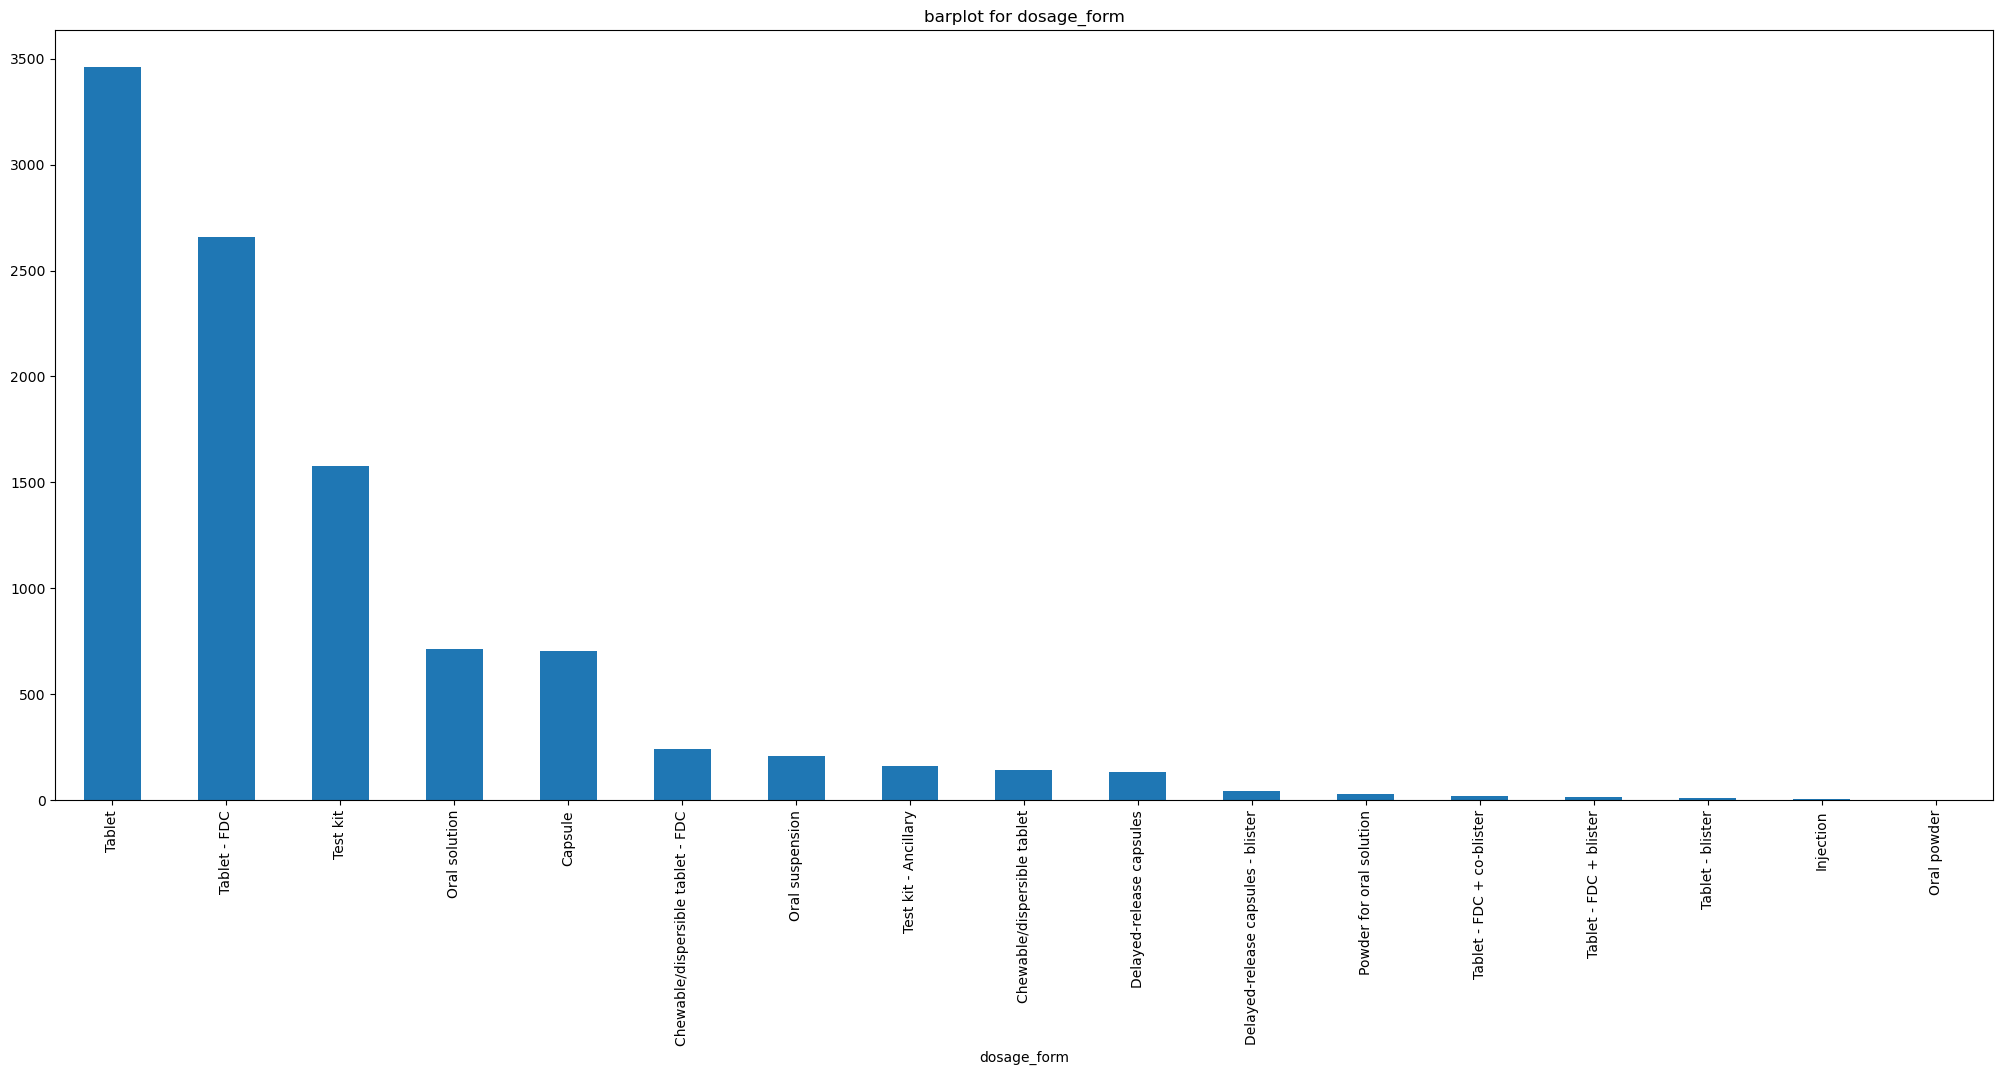

In [98]:
barplot(data["dosage_form"],"dosage_form")

In [99]:
#dropping dosage_form as it is dependent to dosage 
data.drop("dosage_form",axis=1,inplace=True)

In [100]:
data["unit_of_measure_(per_pack)"].value_counts()

unit_of_measure_(per_pack)
60      3993
30      2580
100      974
240      655
120      474
20       470
90       219
300      153
1        126
25       114
180       76
200       75
270       51
336       39
40        25
84        22
1000      16
50        12
3          8
540        7
720        5
2          4
5          4
18         4
36         3
168        3
24         2
12         2
160        1
48         1
144        1
Name: count, dtype: int64

In [101]:
data["unit_of_measure_(per_pack)"].dtype

dtype('int64')

In [102]:
data["line_item_quantity"].value_counts()

line_item_quantity
10000    93
1000     91
100      85
2000     73
5000     69
         ..
2064      1
38113     1
32070     1
9935      1
36639     1
Name: count, Length: 4962, dtype: int64

In [103]:
data["line_item_quantity"].dtype

dtype('int64')

In [104]:
data["line_item_value"].value_counts()

line_item_value
200000.00    29
16000.00     22
800.00       18
0.00         17
14400.00     16
             ..
2666.08       1
1408.00       1
57703.75      1
976.49        1
72911.61      1
Name: count, Length: 8571, dtype: int64

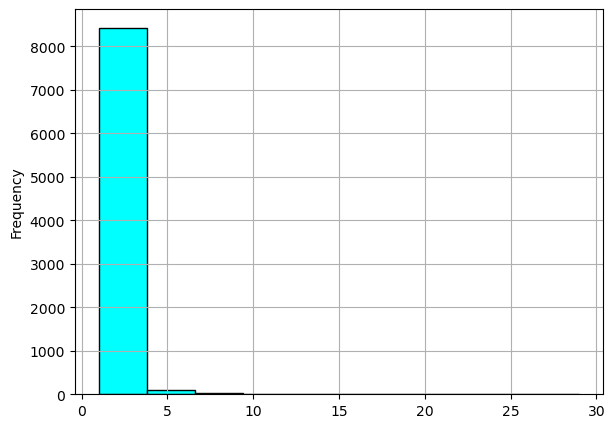

In [105]:
f = plt.figure(figsize=(15,5))
ax = f.add_subplot(121)
data['line_item_value'].value_counts().plot(kind='hist',color= 'Cyan',edgecolor='Black')
plt.grid()

In [106]:
round(data["line_item_value"].describe(),2)

count      10119.00
mean      157236.23
std       344675.47
min            0.00
25%         4283.82
50%        30400.00
75%       165451.22
max      5951990.40
Name: line_item_value, dtype: float64

<Axes: >

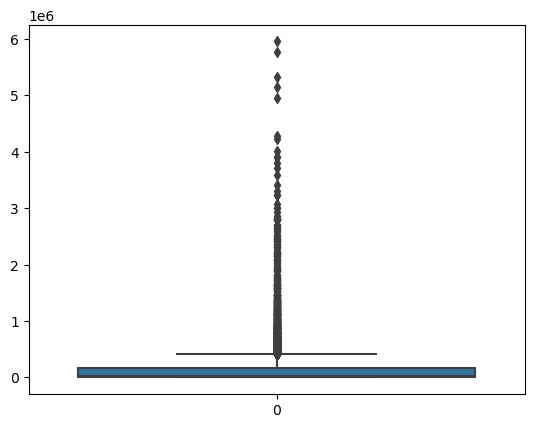

In [107]:
sns.boxplot(data["line_item_value"])

In [108]:
data[data["line_item_value"]>=(data["line_item_value"].mean()+3*data["line_item_value"].std())]

,po_/_so_#,asn/dn_#,country,fulfill_via,vendor_inco_term,pq_first_sent_to_client_date,scheduled_delivery_date,delivered_to_client_date,delivery_recorded_date,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_(kilograms),freight_cost_(usd),shipment_mode,line_item_insurance_(usd)
82,SCMS,ASN,Tanzania,Direct Drop,CIP,2009-06-01 00:00:00,2009-04-21,2009-04-21,2009-04-21,Adult,...,50000,2520000.00,50.40,1.68,"MSD, Haarlem, NL",Yes,4093,9339,Air,4939.20
234,SCMS,ASN,Nigeria,Direct Drop,CIP,2009-06-01 00:00:00,2009-04-08,2009-04-08,2009-04-08,Adult,...,25000,1260000.00,50.40,1.68,"MSD, Haarlem, NL",Yes,2067,7933.38,Air,2469.60
481,SCMS,ASN,Tanzania,Direct Drop,CIP,2009-06-01 00:00:00,2009-06-15,2009-06-15,2009-06-15,Adult,...,24963,1258135.20,50.40,1.68,"MSD, Haarlem, NL",Yes,2462,3451.41,Air,2465.94
1177,SO,DN,Tanzania,From RDC,N/A - From RDC,2009-06-01 00:00:00,2008-08-22,2008-08-22,2008-08-22,Adult,...,145000,1741450.00,12.01,0.40,Mylan (formerly Matrix) Nashik,Yes,11186,9330,Air,2786.32
1388,SO,DN,Kenya,From RDC,N/A - From RDC,2009-06-01 00:00:00,2009-04-27,2009-04-27,2009-04-27,HIV test,...,15000,1200000.00,80.00,0.80,Inverness Japan,No,See DN-1189 (ID#:10759),See DN-1189 (ID#:10759),Truck,2352.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10285,SO,DN,Nigeria,From RDC,N/A - From RDC,2014-04-25 00:00:00,2015-01-30,2015-01-14,2015-01-20,Adult,...,296996,1369151.56,4.61,0.15,Hetero Unit III Hyderabad IN,No,See DN-4097 (ID#:85009),See DN-4097 (ID#:85009),Air Charter,1407.49
10303,SO,DN,Mozambique,From RDC,N/A - From RDC,2014-10-17 00:00:00,2015-05-31,2015-06-09,2015-06-15,Adult,...,200000,1920000.00,9.60,0.32,Hetero Unit III Hyderabad IN,Yes,26603,19194.37,Truck,2259.84
10305,SO,DN,Mozambique,From RDC,N/A - From RDC,2014-10-17 00:00:00,2015-05-29,2015-06-09,2015-06-15,Adult,...,300000,2316000.00,7.72,0.13,Hetero Unit III Hyderabad IN,Yes,39688,28277.42,Truck,2725.93
10315,SO,DN,Nigeria,From RDC,N/A - From RDC,2014-09-19 00:00:00,2015-06-30,2015-05-15,2015-05-22,Adult,...,70000,1304800.00,18.64,0.16,ABBVIE Ludwigshafen Germany,Yes,15198,26180,Air Charter,1341.33


In [109]:
#We have some outliers here hmm lets see i will try to handle it at the last

In [110]:
def box_with_bar_plot(data,col_name):
    f = plt.figure(figsize=(15,5))
    ax = f.add_subplot(121)
    data.value_counts().plot(kind='hist',color= 'Cyan',edgecolor='Black')
    plt.title("bar plot for {}".format(col_name))
    
    ax1 = f.add_subplot(122)
    sns.boxplot(data)
    plt.title("box plot for {}".format(col_name))
    plt.show()

In [111]:
data["unit_price"].describe()

count    10119.000000
mean         0.620278
std          3.308133
min          0.000000
25%          0.080000
50%          0.160000
75%          0.485000
max        238.650000
Name: unit_price, dtype: float64

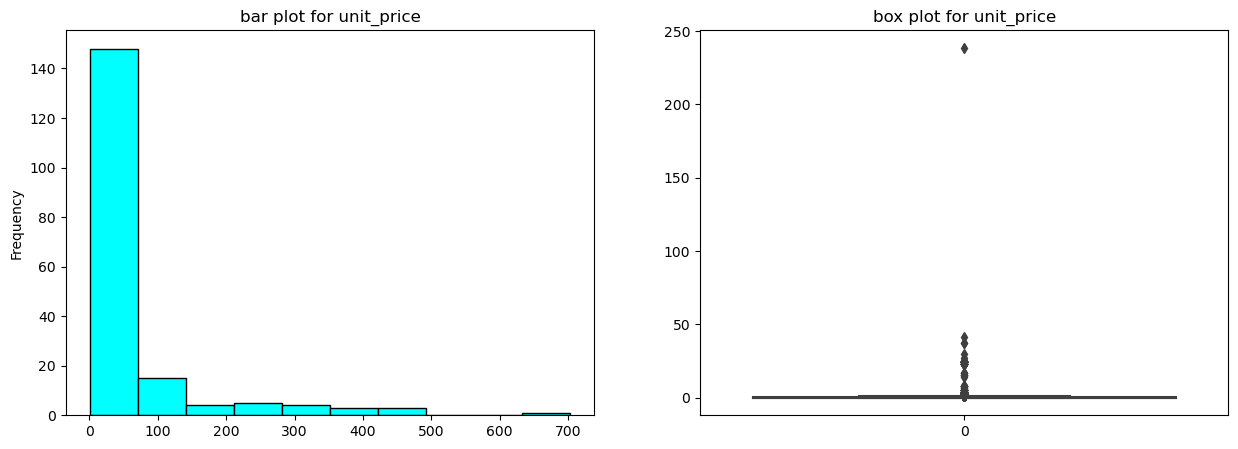

In [112]:
box_with_bar_plot(data["unit_price"],"unit_price")

In [113]:
data["manufacturing_site"].value_counts()

manufacturing_site
Aurobindo Unit III, India              3056
Mylan (formerly Matrix) Nashik         1383
Hetero Unit III Hyderabad IN            858
Cipla, Goa, India                       652
Strides, Bangalore, India.              530
                                       ... 
BUNDI INTERNATIONAL DIAGNOSTICS LTD       1
Remedica, Limassol, Cyprus                1
OMEGA Diagnostics, UK                     1
ABBSP                                     1
Medochemie Factory A, CY                  1
Name: count, Length: 88, dtype: int64

<Axes: xlabel='manufacturing_site'>

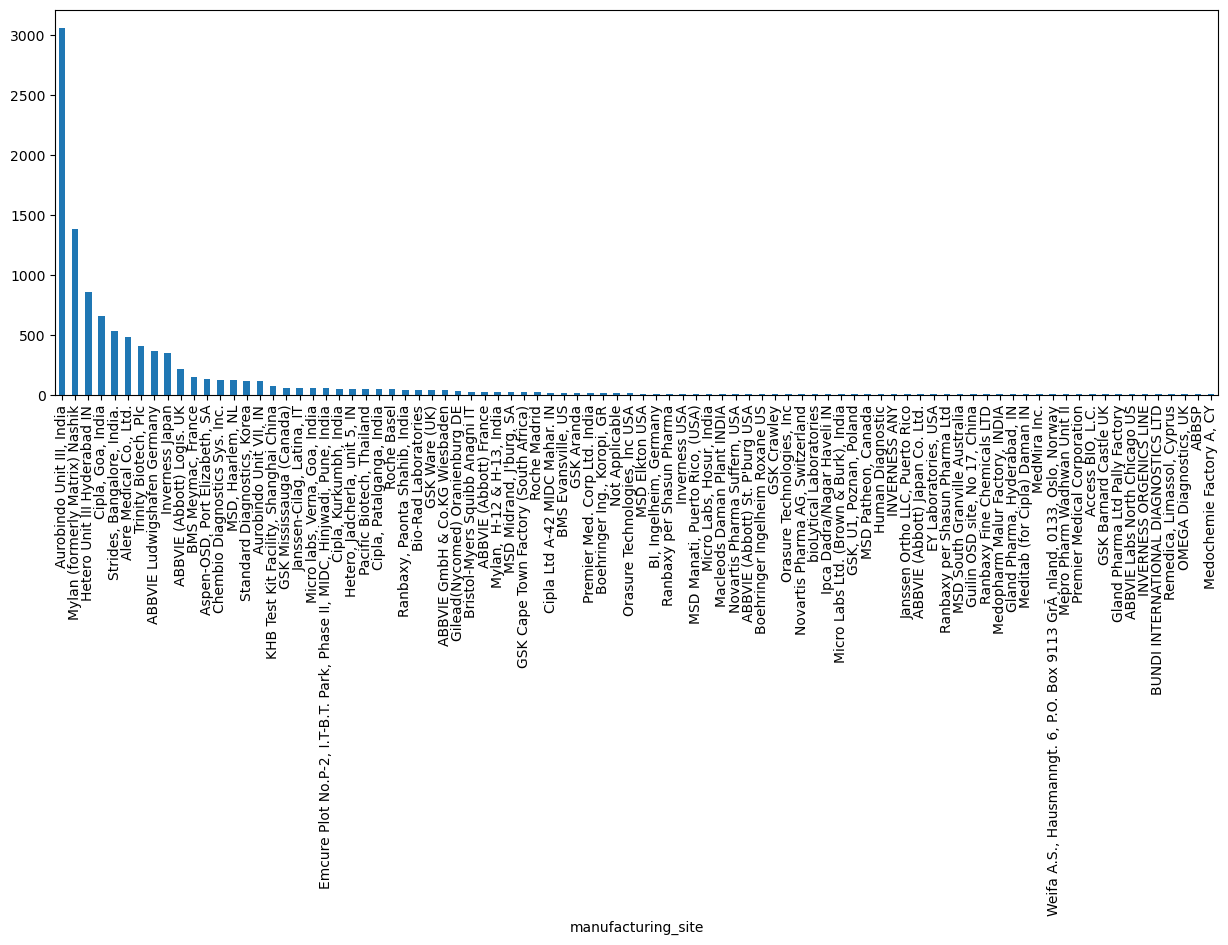

In [114]:
plt.figure(figsize=(15,5))
data["manufacturing_site"].value_counts().plot.bar()

In [115]:
other_manufacture=data["manufacturing_site"].value_counts().to_dict()
other_cat=[]
for key,val in other_manufacture.items():
    if val<=50:
        other_cat.append(key)

In [116]:
data["manufacturing_site"]=data["manufacturing_site"].replace(other_cat,"other")

<Axes: xlabel='manufacturing_site'>

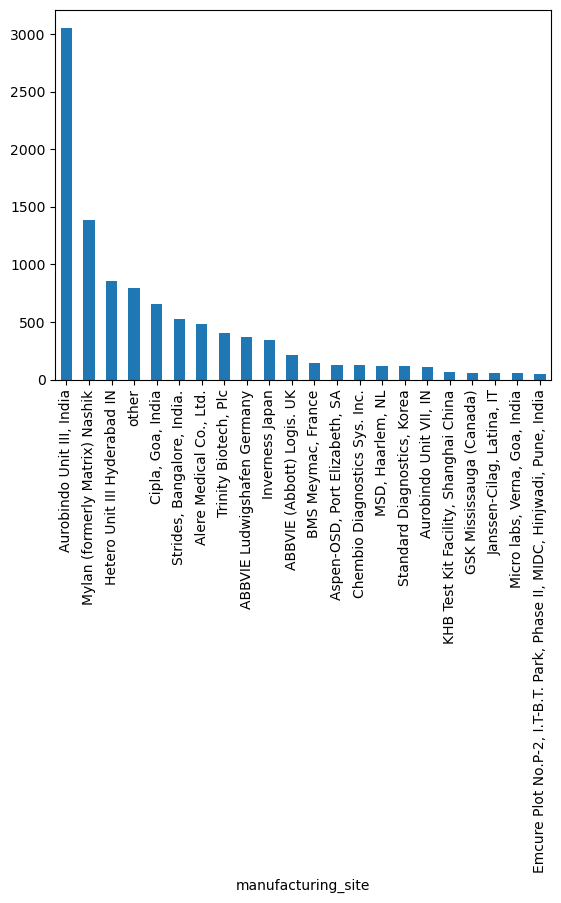

In [117]:
data["manufacturing_site"].value_counts().plot.bar()

In [118]:
data["first_line_designation"].value_counts()

first_line_designation
Yes    6876
No     3243
Name: count, dtype: int64

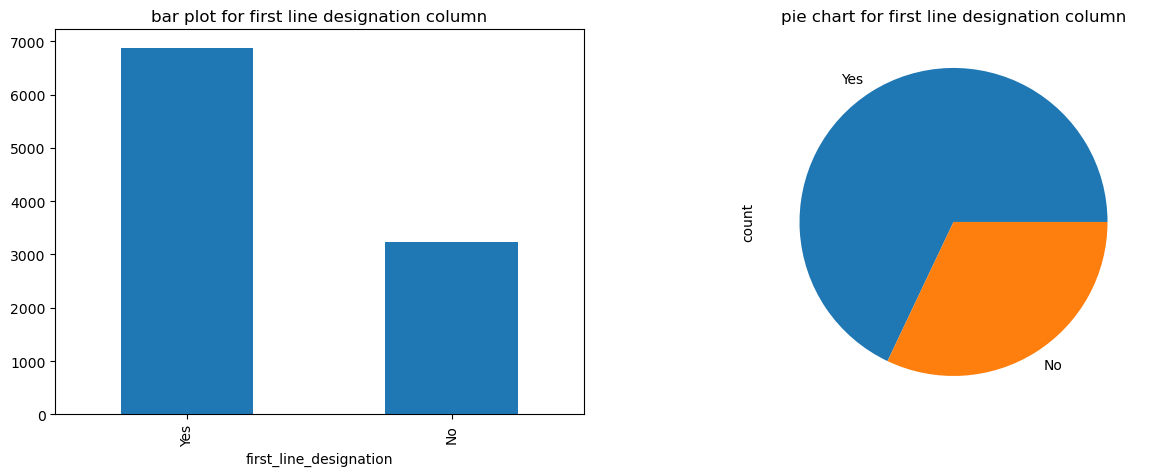

In [119]:
plot(data["first_line_designation"],"first line designation")

In [120]:
data["weight_(kilograms)"].value_counts()

weight_(kilograms)
Weight Captured Separately    1499
2                               29
6                               26
1                               21
5                               20
                              ... 
See DN-667 (ID#:10967)           1
2018                             1
7349                             1
5009                             1
1392                             1
Name: count, Length: 4602, dtype: int64

In [121]:
data.drop("weight_(kilograms)",axis=1,inplace=True)

In [122]:
data["freight_cost_(usd)"].value_counts()

freight_cost_(usd)
Freight Included in Commodity Cost    1440
Invoiced Separately                    231
9736.1                                  36
6147.18                                 27
See DN-304 (ID#:10589)                  16
                                      ... 
1025.37                                  1
35569.75                                 1
4139.95                                  1
8256.97                                  1
See DN-4282 (ID#:83919)                  1
Name: count, Length: 6610, dtype: int64

In [123]:
def trans_freight_cost(x):
    if x.find("See")!=-1:
        return np.nan
    elif x=="Freight Included in Commodity Cost" or x=="Invoiced Separately":
        return 0
    else:
        return x

In [124]:
data["freight_cost_(usd)"]=data["freight_cost_(usd)"].apply(trans_freight_cost)

In [125]:
data["freight_cost_(usd)"].value_counts()

freight_cost_(usd)
0           1671
9736.1        36
6147.18       27
13398.06      16
7329.83       12
            ... 
18423.91       1
21555.16       1
21683.23       1
26084.14       1
3410           1
Name: count, Length: 5343, dtype: int64

In [126]:
data["freight_cost_(usd)"].describe()

count     7725
unique    5343
top          0
freq      1671
Name: freight_cost_(usd), dtype: int64

In [127]:
data.isna().sum()

po_/_so_#                          0
asn/dn_#                           0
country                            0
fulfill_via                        0
vendor_inco_term                   0
pq_first_sent_to_client_date       0
scheduled_delivery_date            0
delivered_to_client_date           0
delivery_recorded_date             0
sub_classification                 0
unit_of_measure_(per_pack)         0
line_item_quantity                 0
line_item_value                    0
pack_price                         0
unit_price                         0
manufacturing_site                 0
first_line_designation             0
freight_cost_(usd)              2394
shipment_mode                      0
line_item_insurance_(usd)          0
dtype: int64

In [128]:
median_value=data["freight_cost_(usd)"].median()
data["freight_cost_(usd)"]=data["freight_cost_(usd)"].replace(np.nan,median_value)
data["freight_cost_(usd)"]

0          780.34
1          4521.5
2         1653.78
3        16007.06
4        45450.08
           ...   
10319     3526.69
10320     3526.69
10321           0
10322           0
10323           0
Name: freight_cost_(usd), Length: 10119, dtype: object

In [129]:
data["freight_cost_(usd)"]=data["freight_cost_(usd)"].astype("float")

In [130]:
data["freight_cost_(usd)"].describe()

count     10119.000000
mean       7536.104702
std       13156.759791
min           0.000000
25%        1211.490000
50%        3526.690000
75%        7783.400000
max      289653.200000
Name: freight_cost_(usd), dtype: float64

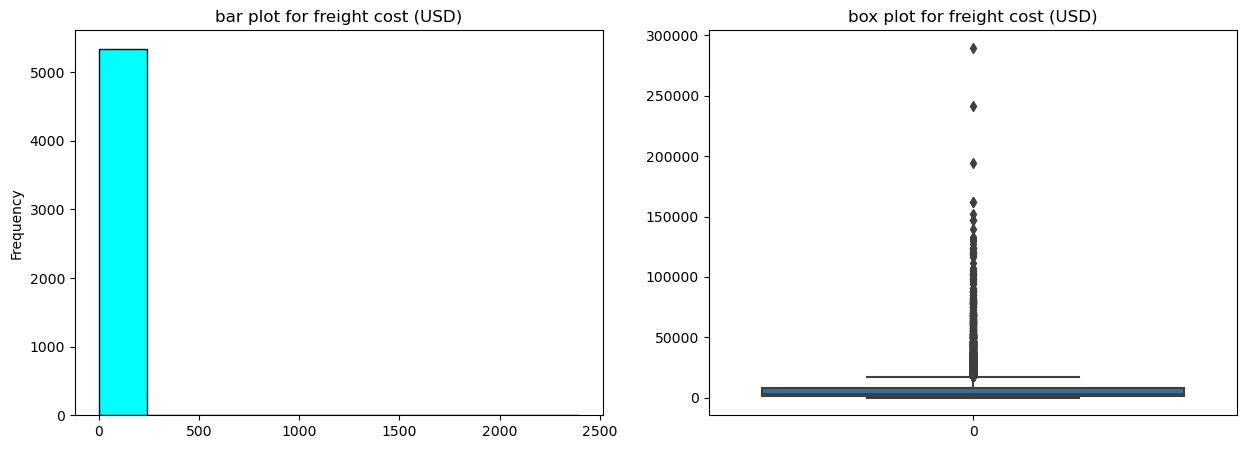

In [131]:
box_with_bar_plot(data["freight_cost_(usd)"],"freight cost (USD)")

In [132]:
data["shipment_mode"].value_counts()

shipment_mode
Air            6367
Truck          2764
Air Charter     618
Ocean           370
Name: count, dtype: int64

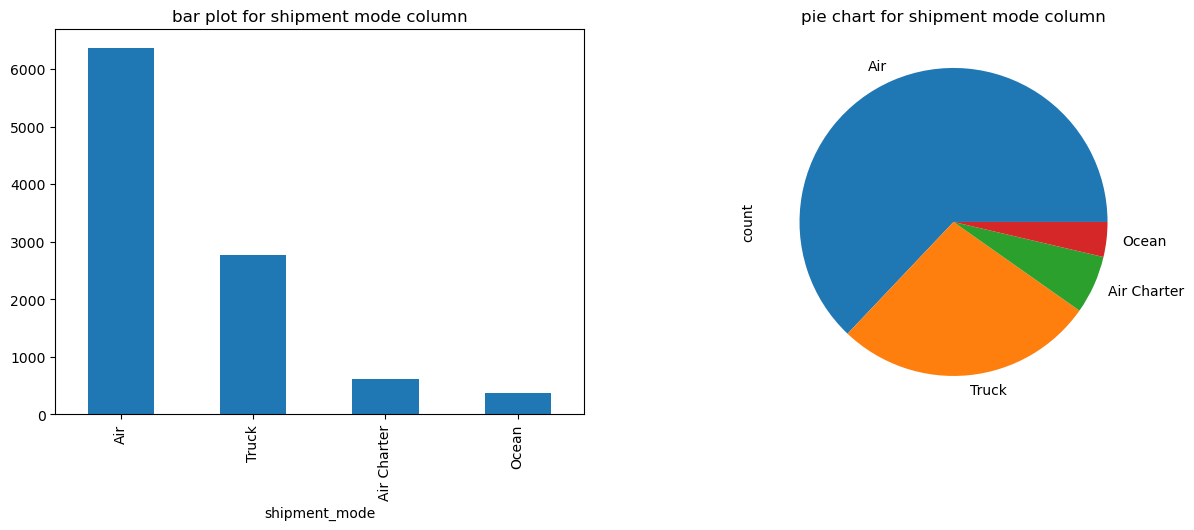

In [133]:
plot(data["shipment_mode"],"shipment mode")

In [134]:
data["line_item_insurance_(usd)"].value_counts()

line_item_insurance_(usd)
47.04     289
0.00       44
0.02       34
0.07       32
0.05       30
         ... 
33.42       1
52.92       1
301.53      1
89.82       1
85.82       1
Name: count, Length: 6607, dtype: int64

In [135]:
data["line_item_insurance_(usd)"].dtype

dtype('float64')

In [136]:
data["line_item_insurance_(usd)"].describe()

count    10119.000000
mean       232.400635
std        487.856951
min          0.000000
25%          6.975000
50%         47.040000
75%        239.160000
max       7005.490000
Name: line_item_insurance_(usd), dtype: float64

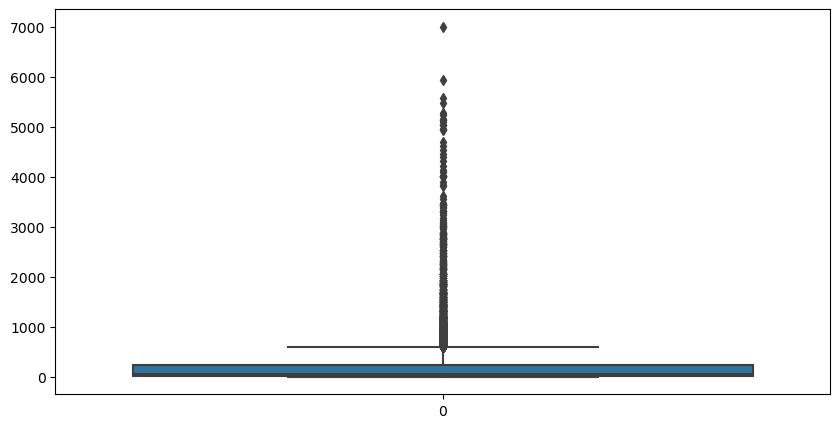

In [137]:
plt.figure(figsize=(10,5))
sns.boxplot(data["line_item_insurance_(usd)"])
plt.show()

In [138]:
data.head()

,po_/_so_#,asn/dn_#,country,fulfill_via,vendor_inco_term,pq_first_sent_to_client_date,scheduled_delivery_date,delivered_to_client_date,delivery_recorded_date,sub_classification,unit_of_measure_(per_pack),line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,freight_cost_(usd),shipment_mode,line_item_insurance_(usd)
0,SCMS,ASN,Côte d'Ivoire,Direct Drop,EXW,2009-06-01 00:00:00,2006-06-02,2006-06-02,2006-06-02,HIV test,30,19,551.0,29.00,0.97,other,Yes,780.34,Air,47.04
1,SCMS,ASN,Vietnam,Direct Drop,EXW,2009-06-01 00:00:00,2006-11-14,2006-11-14,2006-11-14,Pediatric,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,4521.50,Air,47.04
2,SCMS,ASN,Côte d'Ivoire,Direct Drop,FCA,2009-06-01 00:00:00,2006-08-27,2006-08-27,2006-08-27,HIV test,100,500,40000.0,80.00,0.80,other,Yes,1653.78,Air,47.04
3,SCMS,ASN,Vietnam,Direct Drop,EXW,2009-06-01 00:00:00,2006-09-01,2006-09-01,2006-09-01,Adult,60,31920,127360.8,3.99,0.07,other,Yes,16007.06,Air,47.04
4,SCMS,ASN,Vietnam,Direct Drop,EXW,2009-06-01 00:00:00,2006-08-11,2006-08-11,2006-08-11,Adult,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,45450.08,Air,47.04


In [139]:
data.shape

(10119, 20)

In [140]:
data.describe(include="all").T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
po_/_so_#,10119,3,SO,5199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asn/dn_#,10119,2,DN,5199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,10119,42,South Africa,1406,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fulfill_via,10119,2,From RDC,5199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vendor_inco_term,10119,6,N/A - From RDC,5199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pq_first_sent_to_client_date,10119,764,2009-06-01 00:00:00,2476,NaN,NaN,NaN,NaN,NaN,NaN,NaN
scheduled_delivery_date,10119,NaN,NaN,NaN,2011-10-19 17:37:03.184109056,2006-05-02 00:00:00,2009-09-29 12:00:00,2012-01-11 00:00:00,2014-01-08 00:00:00,2015-12-31 00:00:00,NaN
delivered_to_client_date,10119,NaN,NaN,NaN,2011-10-13 14:23:13.892676864,2006-05-02 00:00:00,2009-09-15 00:00:00,2012-01-04 00:00:00,2014-01-13 00:00:00,2015-09-14 00:00:00,NaN
delivery_recorded_date,10119,NaN,NaN,NaN,2011-10-16 13:24:44.613103872,2006-05-02 00:00:00,2009-09-15 00:00:00,2012-01-04 00:00:00,2014-01-20 00:00:00,2015-09-14 00:00:00,NaN
sub_classification,10119,6,Adult,6418,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True)

ValueError: could not convert string to float: 'SCMS'

<Figure size 1000x500 with 0 Axes>

## # Inferences:
- Total_Cost is strongly correlated to column Line Item Value, Line Item Quantity, Line Item Insurance (USD).
- We have Line Item Value and Line Item Quantity with positive linear correlation of 0.84.
- Correlation of Line Item Insurance (USD) and Line Item Value is 0.96.
- Correlation of Line Item Insurance (USD) and Line Item Quantity is 0.8

In [144]:
#calculating total no of days to process the delivery
data.head()

,po_/_so_#,asn/dn_#,country,fulfill_via,vendor_inco_term,pq_first_sent_to_client_date,scheduled_delivery_date,delivered_to_client_date,delivery_recorded_date,sub_classification,unit_of_measure_(per_pack),line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,freight_cost_(usd),shipment_mode,line_item_insurance_(usd)
0,SCMS,ASN,Côte d'Ivoire,Direct Drop,EXW,2009-06-01 00:00:00,2006-06-02,2006-06-02,2006-06-02,HIV test,30,19,551.0,29.00,0.97,other,Yes,780.34,Air,47.04
1,SCMS,ASN,Vietnam,Direct Drop,EXW,2009-06-01 00:00:00,2006-11-14,2006-11-14,2006-11-14,Pediatric,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,4521.50,Air,47.04
2,SCMS,ASN,Côte d'Ivoire,Direct Drop,FCA,2009-06-01 00:00:00,2006-08-27,2006-08-27,2006-08-27,HIV test,100,500,40000.0,80.00,0.80,other,Yes,1653.78,Air,47.04
3,SCMS,ASN,Vietnam,Direct Drop,EXW,2009-06-01 00:00:00,2006-09-01,2006-09-01,2006-09-01,Adult,60,31920,127360.8,3.99,0.07,other,Yes,16007.06,Air,47.04
4,SCMS,ASN,Vietnam,Direct Drop,EXW,2009-06-01 00:00:00,2006-08-11,2006-08-11,2006-08-11,Adult,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,45450.08,Air,47.04


In [145]:
data.dtypes

po_/_so_#                               object
asn/dn_#                                object
country                                 object
fulfill_via                             object
vendor_inco_term                        object
pq_first_sent_to_client_date            object
scheduled_delivery_date         datetime64[ns]
delivered_to_client_date        datetime64[ns]
delivery_recorded_date          datetime64[ns]
sub_classification                      object
unit_of_measure_(per_pack)               int64
line_item_quantity                       int64
line_item_value                        float64
pack_price                             float64
unit_price                             float64
manufacturing_site                      object
first_line_designation                  object
freight_cost_(usd)                     float64
shipment_mode                           object
line_item_insurance_(usd)              float64
dtype: object

In [146]:
data["days_to_process"]=data["delivery_recorded_date"]-data["pq_first_sent_to_client_date"]

In [151]:
data["days_to_process"]

0        -1095 days +00:00:00
1         -930 days +00:00:00
2        -1009 days +00:00:00
3        -1004 days +00:00:00
4        -1025 days +00:00:00
                 ...         
10319       277 days 00:00:00
10320       287 days 00:00:00
10321       387 days 00:00:00
10322        41 days 00:00:00
10323       299 days 00:00:00
Name: days_to_process, Length: 10119, dtype: object

In [148]:
data["days_to_process"].max()

Timedelta('724 days 00:00:00')

In [149]:
data["days_to_process"].min()

Timedelta('-1126 days +00:00:00')

In [153]:
data["days_to_process"]..to

<bound method NDFrame.astype of 0        -1095 days +00:00:00
1         -930 days +00:00:00
2        -1009 days +00:00:00
3        -1004 days +00:00:00
4        -1025 days +00:00:00
                 ...         
10319       277 days 00:00:00
10320       287 days 00:00:00
10321       387 days 00:00:00
10322        41 days 00:00:00
10323       299 days 00:00:00
Name: days_to_process, Length: 10119, dtype: object>

In [152]:
data['days_to_process'] = data['days_to_process'].dt.days.astype('int64')

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
data["days_to_process"]

In [ ]:
sns.boxplot(data["days_to_process"])

In [ ]:
data.drop(["delivery_recorded_date","pq_first_sent_to_client_date","scheduled_delivery_date"],axis=1,inplace=True)

In [ ]:
data.drop(["delivered_to_client_date"],axis=1,inplace=True)

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
cat_col=[x for x in data.columns if data[x].dtypes=="O"]

In [291]:
(cat_col)

NameError: name 'cat_col' is not defined

In [ ]:
num_col=[y for y in data.columns if data[y].dtypes=="int64" or data[y].dtypes=="float64"]

In [ ]:
(num_col)

In [ ]:
num=data[num_col]
for i in enumerate(num_col):
    f = plt.figure(figsize=(18,5))
    ax = f.add_subplot(131)
    sns.boxplot(num[i[1]], color= 'Green')

    ax1 = f.add_subplot(132)
    sns.distplot(num[i[1]], rug = True,  color= 'Green',kde=True)
    
    ax2 = f.add_subplot(133)
    sns.violinplot(num[i[1]], orient= 'vertical',  color= 'Green')
    plt.tight_layout()
    plt.show()

In [ ]:
cat=data[cat_col]
for i in enumerate(cat_col):
    plot(cat[i[1]],"categorical")

In [ ]:
#outlier detection
def outlier_detection(data,colname):
    data=data[data[colname]<=(data[colname].mean()+3*data[colname].std())]
    return data

In [ ]:
data.head()

In [ ]:
data0=outlier_detection(data,"line_item_value")
data0.shape

In [ ]:
data1=outlier_detection(data0,"unit_of_measure_(per_pack)")
data0.shape,data1.shape

In [ ]:
data2=outlier_detection(data1,"pack_price")
data1.shape,data2.shape

In [ ]:
data3=outlier_detection(data2,"unit_price")
data3.shape

In [ ]:
data4=outlier_detection(data3,"days_to_process")
data4.shape

In [ ]:
data=data4.copy()

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
data.isna().sum()

In [ ]:
catcol=data[cat_col]
for i in enumerate(cat_col):
    fig=plt.figure(figsize=(15,5))
    ax = fig.add_subplot(131)
    sns.boxplot(x= catcol[i[1]], y= data["line_item_value"])
    plt.xticks(rotation=90)
    
    ax1 = fig.add_subplot(132)
    sns.barplot(x = catcol[i[1]], y= data['line_item_value'])
    plt.xticks(rotation=90)
    
    fig2 = fig.add_subplot(133)
    sns.violinplot(x = catcol[i[1]], y= data['line_item_value'])
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
numcol=data[num_col]
for i in enumerate(num_col):
    fig=plt.figure(figsize=(25,10))
    sns.scatterplot(x = numcol[i[1]],y = data["line_item_value"],color="maroon")

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
#feature Engineering 

In [ ]:
data["po_/_so_#"].value_counts()
data["po_/_so_#"]=pd.get_dummies(data["po_/_so_#"],drop_first=True)

In [ ]:
data["asn/dn_#"].value_counts()
data["asn/dn_#"]=pd.get_dummies(data["asn/dn_#"],drop_first=True)

In [ ]:
data["country"].value_counts()
frequency=data["country"].value_counts().to_dict()
data["country"]=data["country"].map(frequency)

In [ ]:
data["fulfill_via"].value_counts()
data["fulfill_via"]=pd.get_dummies(data["fulfill_via"],drop_first=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()

In [ ]:
data["vendor_inco_term"].value_counts()
data["vendor_inco_term"]=lr.fit_transform(data["vendor_inco_term"])

In [ ]:
data["sub_classification"].value_counts()
data["sub_classification"]=lr.fit_transform(data["sub_classification"])

In [ ]:
data["manufacturing_site"].value_counts()
data.drop(["manufacturing_site"],axis=1,inplace=True)

In [ ]:
data["first_line_designation"].value_counts()
data["first_line_designation"]=pd.get_dummies(data["first_line_designation"],drop_first=True)

In [ ]:
data["shipment_mode"].value_counts()
data["shipment_mode"]=lr.fit_transform(data["shipment_mode"])

In [ ]:
data

In [ ]:
data.info()

In [ ]:
data.shape

In [ ]:
sns.heatmap(data.corr())

In [ ]:
x=data.drop(["line_item_value"],axis=1)
y=data["line_item_value"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LassoCV

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
train, test, = train_test_split(data, test_size=0.20, random_state=42)

In [ ]:
def shape(train,test):
        print("The shape of {} is  {} {}".format("train,test",train.shape,test.shape))

In [ ]:
shape(train,test)


In [ ]:
scaler=MinMaxScaler()
scaled_train=scaler.fit_transform(train)
scaled_test=scaler.transform(test)

In [ ]:
data_train_scaled=pd.DataFrame(scaled_train,columns=data.columns)
data_train_scaled

In [ ]:
data_test_scaled=pd.DataFrame(scaled_test,columns=data.columns)
data_test_scaled

In [ ]:
x_train=data_train_scaled.drop(["line_item_value"],axis=1)
y_train=data_train_scaled["line_item_value"]

x_test=data_test_scaled.drop(["line_item_value"],axis=1)
y_test=data_test_scaled["line_item_value"]

In [ ]:
x_train.head()
x_train.shape

In [ ]:
x_test.head()
x_test.shape

In [ ]:
y_train[:3]

In [ ]:
y_test[:3]

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)

In [ ]:
lr.score(x_train,y_train)

In [ ]:
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)

In [ ]:
def adjusted_r2(data,true,pred):
    r2=r2_score(true,pred)
    n=data.shape[0]
    p=data.shape[1]
    adj_r2=1-(1-r2)*(n-1)/(n-p*1)
    return adj_r2

In [ ]:
def accuracy_metrics(test,pred,type_):
    r2=r2_score(test,pred)
    rmse=np.sqrt(mean_squared_error(test,pred))
    if r2:
        print("The r2 score for {} is {}%".format(type_,(r2*100)))
        print("RMSE score for {} is {}".format(type_,(rmse)))
#       print("adjusted r2 score is {}%".format(adj_r2*100))
    return None

In [ ]:
#for test accuracy
accuracy_metrics(y_test,y_pred_test,"train")

In [ ]:
#for train accuracy
accuracy_metrics(y_train,y_pred_train,"test")

In [ ]:
def rmse(y_true,y_pred):
    rmse = np.sqrt(mean_squared_error(y_true,y_pred))
    return rmse

In [ ]:
results = pd.DataFrame(columns = ['Algorithm','Train_R2 score','Train_Adj_R2 score','Train_RMSE score',
                                 'Test_R2 score','Test_Adj_R2 score','Test_RMSE score'])

In [ ]:

results.loc[len(results)] = ['Linear Regression',r2_score(y_train,y_pred_train),
                             adjusted_r2(x_train,y_train,y_pred_train),
                             rmse(y_train,y_pred_train),r2_score(y_test,y_pred_test),
                             adjusted_r2(x_test,y_test,y_pred_test),rmse(y_test,y_pred_test)]

In [ ]:
results

In [ ]:
lasso=LassoCV()
lasso.fit(x_train,y_train)
print("Best alpha built using lasso regressor is %f"%lasso.alpha_)
print("Best score using built-in LassoCV: %f" %lasso.score(x_train,y_train))

In [ ]:
coef = pd.Series(lasso.coef_, index = x_train.columns)
round(coef,2)

In [ ]:
#Feature importance by Lasso
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

In [ ]:
#Visualization

imp_coef_lasso = coef.sort_values()

import matplotlib

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)

imp_coef_lasso.plot(kind="barh")

plt.title("Feature importance using Lasso Model")

In [ ]:
features_by_lasso = imp_coef_lasso

In [ ]:
y_pred_lasso_train=lasso.predict(x_train)
y_pred_lasso_test=lasso.predict(x_test)

In [ ]:

#for test accuracy
accuracy_metrics(y_test,y_pred_lasso_test,"test")

In [ ]:
#for train accuracy
accuracy_metrics(y_train,y_pred_lasso_train,"train")

In [ ]:
results.loc[len(results)] = ['Lasso Regression',r2_score(y_train,y_pred_lasso_train),
                             adjusted_r2(x_train,y_train,y_pred_lasso_train),
                             rmse(y_train,y_pred_lasso_train),r2_score(y_test,y_pred_lasso_test),
                             adjusted_r2(x_test,y_test,y_pred_lasso_test),rmse(y_test,y_pred_lasso_test)]

In [ ]:
x=data.drop(["line_item_value"],axis=1)
y=data["line_item_value"]

In [ ]:
#Train-test-split

X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.30, random_state=42, shuffle = True)

print('The shapes of X_train = {0}, y_train = {1}, X_test = {2},y_test = {3}'.format(X_train.shape,
                                                                                     y_train.shape,
                                                                                     X_test.shape,
                                                                                     y_test.shape))

In [ ]:
tree=DecisionTreeRegressor()

In [ ]:
# Importing Randomized Search CV

from sklearn.model_selection import RandomizedSearchCV

params = {'criterion':['mse','friedman_mse','mae','poisson'],
          'max_depth':[2,5,10,20],
          'min_samples_split':[2,4,8,12],
          'min_samples_leaf':[2,4,8,10]}

# randomized search cv

RCV = RandomizedSearchCV(estimator=tree, 
                         param_distributions=params, 
                         n_iter = 10,  
                         scoring='r2', 
                         cv = 10, 
                         verbose=2, 
                         random_state=42, 
                         n_jobs=-1, 
                         return_train_score=True)

RCV.fit(X_train,y_train)